In [39]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.feature_selection import VarianceThreshold

from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import RocCurveDisplay

import seaborn

import matplotlib.pyplot as plt

In [7]:
toden = pd.read_csv('gsea outputs/Toden.Hallmarks50.gct', skiprows = 2,index_col = 0, sep = '\t').drop('Description',axis = 1).T
silver = pd.read_csv('gsea outputs/Silver.Hallmarks50.gct', skiprows = 2,index_col = 0, sep = '\t').drop('Description',axis = 1).T
burgos = pd.read_csv('gsea outputs/Burgos.Hallmarks50.gct', skiprows = 2,index_col = 0, sep = '\t').drop('Description',axis = 1).T


In [47]:
toden_counts = pd.read_csv('cleaned_tolden_data_col_fixed.csv', index_col = 0)['hasAD']
silver_counts = pd.read_csv('cleaned_silver_data_counts.csv', index_col = 0)['hasAD']
burgos_counts = pd.read_csv('cleaned_burgos_data_counts.csv', index_col = 0)['hasAD']

In [50]:
toden = toden.loc[toden_counts.index]
silver = silver.loc[silver_counts.index]
burgos = burgos.loc[burgos_counts.index]

In [19]:
X = toden
y = toden_counts.loc[X.index]

X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2, random_state=666)


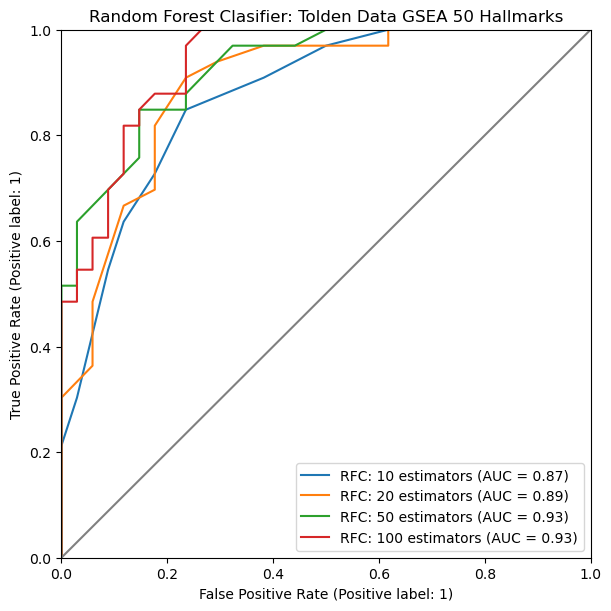

In [20]:
fig,ax = plt.subplots(1,1,constrained_layout = True)
fig.set_size_inches((6,6))

classifiers = {}

for n in [10,20,50,100]:

    rfc = RF(n_estimators=n, random_state=666)
    rfc.fit(X_train, y_train)

    y_pred = [x[1] for x in rfc.predict_proba((X_test))]

    display = RocCurveDisplay.from_predictions(
        y_test,
        y_pred,
        name='RFC: {n} estimators'.format(n=n),
        ax=ax
    )
    
    classifiers[n] = rfc

ax.set_xlim((0,1))
ax.set_ylim((0,1))

ax.plot([0,1],[0,1], color = 'grey')

ax.set_title('Random Forest Clasifier: Tolden Data GSEA 50 Hallmarks')

plt.show()

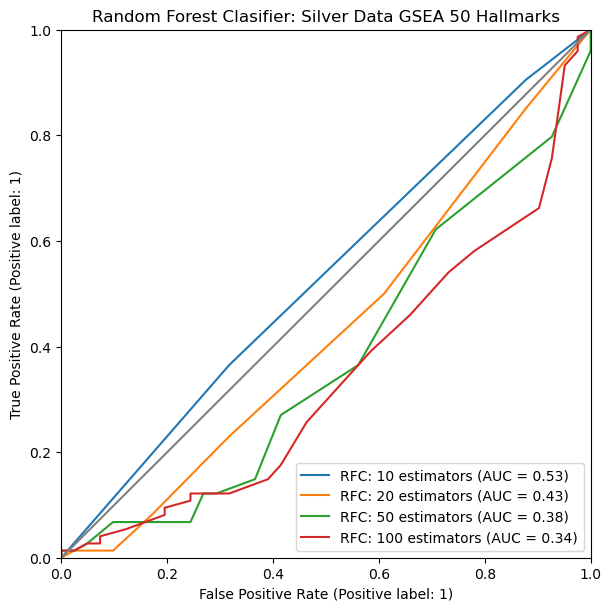

In [21]:
X = silver
y = silver_counts.loc[silver.index]

fig,ax = plt.subplots(1,1,constrained_layout = True)
fig.set_size_inches((6,6))

for n in classifiers:

    rfc = classifiers[n]

    y_pred = [x[1] for x in rfc.predict_proba((X))]

    display = RocCurveDisplay.from_predictions(
        y,
        y_pred,
        name='RFC: {n} estimators'.format(n=n),
        ax=ax
    )
    
    classifiers[n] = rfc

ax.set_xlim((0,1))
ax.set_ylim((0,1))

ax.plot([0,1],[0,1], color = 'grey')

ax.set_title('Random Forest Clasifier: Silver Data GSEA 50 Hallmarks')

plt.show()

In [23]:
from scipy.stats import pearsonr

In [33]:
toden_corr = pd.DataFrame({gs:list(pearsonr(toden[gs].values, toden_counts.loc[toden.index].values))
 for gs in toden}).rename({0:'R',1:'pval'}).T.sort_values(by = 'R')

In [34]:
silver_corr = pd.DataFrame({gs:list(pearsonr(silver[gs].values, silver_counts.loc[silver.index].values))
 for gs in silver}).rename({0:'R',1:'pval'}).T.sort_values(by = 'R')

In [51]:
burgos_corr = pd.DataFrame({gs:list(pearsonr(burgos[gs].values, burgos_counts.loc[burgos.index].values))
 for gs in burgos}).rename({0:'R',1:'pval'}).T.sort_values(by = 'R')

<AxesSubplot:>

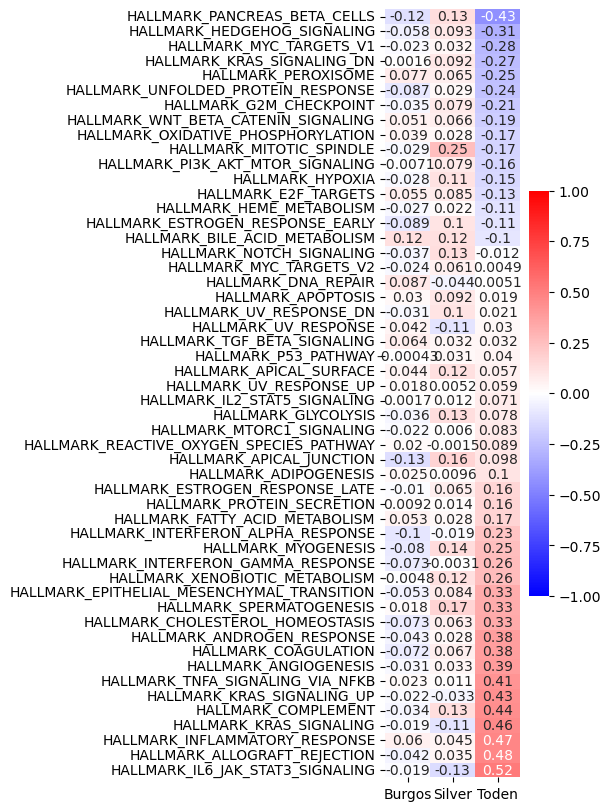

In [52]:

graph_df = pd.DataFrame({'Burgos':burgos_corr['R'],'Silver':silver_corr['R'],'Toden':toden_corr['R']}).sort_values(by = 'Toden')

fig,ax = plt.subplots(1,1,constrained_layout = True, figsize = (6,8))

seaborn.heatmap(graph_df, cmap = 'bwr', vmin = -1,vmax = 1,center = 0,
               ax=ax, annot = True, yticklabels = True)

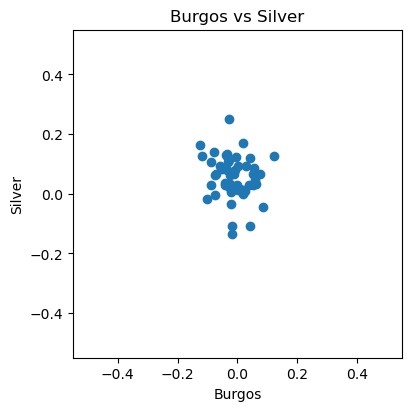

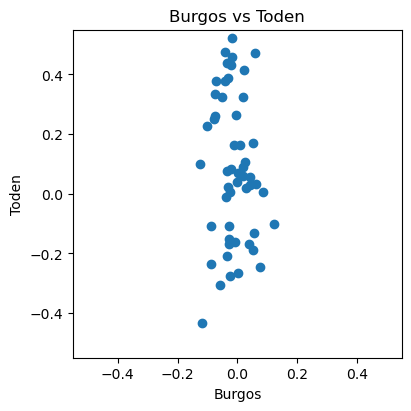

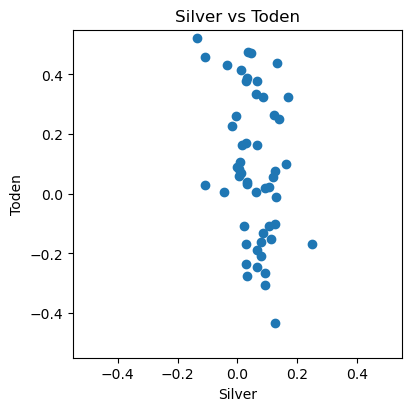

In [57]:
for xcol in graph_df:
    for ycol in graph_df:
        if xcol<ycol:
            fig,ax = plt.subplots(1,1,constrained_layout = True, figsize = (4,4))


            ax.scatter(graph_df[xcol],graph_df[ycol])
            ax.set_xlabel(xcol)
            ax.set_ylabel(ycol)
            
            ax.set_xlim((-0.55,0.55))
            ax.set_ylim((-0.55,0.55))
            
            ax.set_title(xcol+' vs '+ycol)

            plt.show()

In [55]:
graph_df.min().min()

-0.4334010559232589

In [56]:
graph_df.max().max()

0.521855214662404